<a href="https://colab.research.google.com/github/paulaprado1904/MachineLearning/blob/main/Cap%C3%ADtulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação

##MNIST

 Scikit-Learn fornece muitas funções auxiliares para baixar conjuntos de dados popula
res. O MNIST é um deles. O código a seguir busca o conjunto de dados MNIST em
 OpenML.org:

In [ ]:
from sklearn.datasets import fetch_openml  # Importa a função fetch_openml do módulo sklearn.datasets

mnist = fetch_openml('mnist_784', as_frame=False)  # Usa a função fetch_openml para baixar o dataset MNIST


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:100: UserWarning: A network error occurred while downloading https://openml.org/api/v1/json/data/list/data_name/mnist_784/limit/2/status/active/. Retrying...
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X, y = mnist.data, mnist.target  # Separa os dados e rótulos

y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

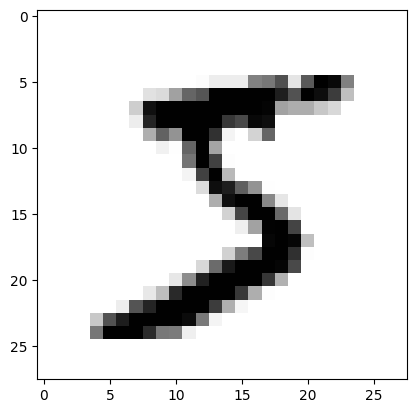

In [ ]:
import matplotlib.pyplot as plt  # Importa o módulo pyplot do matplotlib, usado para criar gráficos

def plot_digit(image_data):  # Define uma função chamada plot_digit que recebe image_data como argumento
    image = image_data.reshape(28, 28)  # Redimensiona os dados da imagem para uma matriz 28x28
    plt.imshow(image, cmap="binary")  # Plota a imagem usando uma escala de cores binária (preto e branco)
    ##plt.axis("off")  # Desativa os eixos da plotagem para uma visualização mais limpa

some_digit = X[0]  # Seleciona a primeira imagem do conjunto de dados X
plot_digit(some_digit)  # Chama a função plot_digit para plotar a imagem selecionada
plt.show()  # Exibe a plotagem


In [ ]:
y[0]

'5'


1. **Divisão dos Dados em Conjuntos de Treinamento e Teste**:
   ```python
   X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
   ```

   - **X_train**: Conjunto de treinamento para as características (imagens), que contém as primeiras 60.000 amostras de `X`.
   - **X_test**: Conjunto de teste para as características (imagens), que contém as amostras de `X` a partir da posição 60.000 até o final.
   - **y_train**: Conjunto de treinamento para os rótulos (dígitos), que contém as primeiras 60.000 amostras de `y`.
   - **y_test**: Conjunto de teste para os rótulos (dígitos), que contém as amostras de `y` a partir da posição 60.000 até o final.

### Contexto

O dataset MNIST possui 70.000 imagens de dígitos manuscritos, onde os primeiros 60.000 são geralmente usados para treinamento do modelo, e os últimos 10.000 são usados para teste.

### Importância

1. **Conjunto de Treinamento (Training Set)**:
   - `X_train` e `y_train` são usados para ajustar (treinar) o modelo. Isso envolve ajustar os parâmetros do modelo para minimizar o erro de predição sobre o conjunto de treinamento.

2. **Conjunto de Teste (Test Set)**:
   - `X_test` e `y_test` são usados para avaliar o desempenho do modelo em dados que ele não viu durante o treinamento. Isso é crucial para validar se o modelo está generalizando bem para novos dados, ou se está apenas memorizando os dados de treinamento (overfitting).

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train_5 = (y_train == '5')  # Cria um vetor booleano onde cada valor indica se o respectivo dígito no conjunto de treinamento é 5
y_test_5 = (y_test == '5')  # Cria um vetor booleano onde cada valor indica se o respectivo dígito no conjunto de teste é 5


In [ ]:
from sklearn.linear_model import SGDClassifier  # Importa a classe SGDClassifier da biblioteca scikit-learn

sgd_clf = SGDClassifier(random_state=42)  # Cria uma instância do classificador SGD (Stochastic Gradient Descent) com um valor de random_state definido para 42,
#                                          garantindo a reprodutibilidade dos resultados

sgd_clf.fit(X_train, y_train_5)  # Treina o classificador usando o conjunto de treinamento X_train e os rótulos binários y_train_5

SGDClassifier(random_state=42)

^^^^^^^^^

Gradiente Descendente Estocástico (Stochastic Gradient Descent, SGD) é um algoritmo de otimização amplamente utilizado em aprendizado de máquina e redes neurais. Ele é uma variação do método de Gradiente Descendente, que é usado para minimizar uma função de custo ou erro.

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

### Importância da Validação Cruzada

A validação cruzada é uma técnica fundamental em machine learning que visa avaliar a performance de um modelo de maneira robusta e confiável. Ela é especialmente importante por várias razões:

1. **Generalização**: Avalia como o modelo generaliza para dados não vistos. Isso ajuda a evitar overfitting, onde o modelo se ajusta muito bem aos dados de treino, mas não consegue performar bem em novos dados.

2. **Eficiência de Dados**: Utiliza eficientemente o conjunto de dados disponível. Em vez de dividir os dados em um único conjunto de treino e teste, a validação cruzada permite que todos os dados sejam usados tanto para treino quanto para teste em diferentes iterações.

3. **Variabilidade na Avaliação**: Proporciona uma estimativa mais precisa da performance do modelo ao avaliar em diferentes subconjuntos de dados. Isso reduz a variabilidade nos resultados de avaliação e fornece uma métrica de desempenho mais estável.

4. **Bias-Variance Trade-off**: Ajuda a balancear o trade-off entre bias (erro de treinamento) e variance (erro de generalização), permitindo ajustes finos nos parâmetros do modelo e na escolha de algoritmos.

5. **Comparação de Modelos**: Facilita a comparação de diferentes modelos ou configurações, fornecendo uma base sólida para escolher o melhor modelo com base em métricas de avaliação consistentes.

### O que a Validação Cruzada Faz

A validação cruzada divide os dados disponíveis em várias partes e usa essas divisões para treinar e testar o modelo em diferentes iterações. A técnica mais comum é a **K-Fold Cross-Validation**, que funciona da seguinte maneira:

1. **Divisão dos Dados**: Os dados são divididos aleatoriamente em \( k \) subconjuntos (folds) aproximadamente do mesmo tamanho.
2. **Iteração**: O processo é repetido \( k \) vezes (número de folds):
   - Em cada iteração, um dos \( k \) folds é usado como conjunto de teste, enquanto os \( k-1 \) folds restantes são usados como conjunto de treino.
3. **Treinamento e Avaliação**: O modelo é treinado nos \( k-1 \) folds de treino e avaliado no fold de teste. Este processo é repetido para cada fold.
4. **Média das Métricas**: As métricas de desempenho (como acurácia, precisão, recall, F1-score, etc.) são calculadas para cada fold e, ao final, é feita uma média dessas métricas para obter uma estimativa final da performance do modelo.

### Exemplo de Validação Cruzada com K-Fold

```python
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Carregar dataset de exemplo
data = load_iris()
X, y = data.data, data.target

# Instanciar o modelo
model = LogisticRegression(max_iter=200)

# Realizar K-Fold Cross-Validation com 5 folds
scores = cross_val_score(model, X, y, cv=5)

print("Scores de cada fold:", scores)
print("Média dos scores:", scores.mean())
```

### Saída Esperada
```plaintext
Scores de cada fold: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Média dos scores: 0.9733333333333334
```

### Tipos de Validação Cruzada
Além do K-Fold, existem outras técnicas de validação cruzada, como:

1. **Stratified K-Fold**: Garante que cada fold tenha a mesma proporção de classes que o conjunto de dados original, útil para dados desbalanceados.
2. **Leave-One-Out (LOO)**: Cada exemplo de dados é usado uma vez como conjunto de teste, enquanto o restante é usado para treino.
3. **Time Series Split**: Útil para dados temporais, onde o conjunto de treino e teste são divididos respeitando a ordem temporal dos dados.

### Conclusão

A validação cruzada é uma técnica poderosa para avaliar a robustez e a capacidade de generalização de um modelo de machine learning. Ao usar múltiplas divisões de dados para treino e teste, ela fornece uma estimativa mais confiável da performance do modelo em dados não vistos e ajuda na comparação justa entre diferentes modelos ou configurações.

In [ ]:
from sklearn.model_selection import cross_val_score  # Importa a função cross_val_score do módulo model_selection do scikit-learn
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")  # Executa a validação cruzada

array([0.95035, 0.96035, 0.9604 ])

Explicação código da caixa abaixo:

### O que está acontecendo:

1. **Importação e Instanciação**: O `DummyClassifier` é importado e uma instância é criada.
2. **Treinamento**: O classificador é treinado com os dados de treino e seus rótulos.
3. **Predição e Verificação**: O classificador faz previsões sobre os dados de treino, e a função `any` verifica se há pelo menos uma previsão de que a imagem seja o dígito '5'.
4. **Resultado**: O resultado (`True` ou `False`) é impresso, indicando se o classificador previu pelo menos uma instância como sendo '5'.

### Importância do DummyClassifier:
- **Baseline**: Serve como um benchmark simples para comparar com outros modelos mais complexos.
- **Diagnóstico de Modelo**: Ajuda a entender se um modelo sofisticado realmente está aprendendo algo útil ou se suas previsões não são melhores que um modelo simples.
- **Controle**: Pode ser usado para testes e validações iniciais de pipelines de machine learning.

### Exemplo de Saída:
Se o classificador previr que pelo menos uma instância em `X_train` é '5', a saída será `True`; caso contrário, será `False`. Isso dá uma ideia de como o classificador está fazendo previsões triviais sem realmente "entender" os dados.

In [ ]:
from sklearn.dummy import DummyClassifier  # Importa a classe DummyClassifier do módulo dummy do scikit-learn
dummy_clf = DummyClassifier()  # Instancia um objeto DummyClassifier com os parâmetros padrão
dummy_clf.fit(X_train, y_train_5)  # Treina o DummyClassifier usando os dados de treino X_train e os rótulos y_train_5
print(any(dummy_clf.predict(X_train)))  # Prediz os rótulos para X_train e imprime se pelo menos uma previsão é verdadeira

False


In [ ]:
#avaliando a precisão desse modelo
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")  # Executa a validação cruzada

array([0.90965, 0.90965, 0.90965])

In [ ]:
from sklearn.model_selection import cross_val_predict

# Realiza predições usando validação cruzada com 3 dobras (cv=3)
# 'sgd_clf' é o classificador, 'X_train' são os dados de treino e 'y_train_5' são os rótulos de treino
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [ ]:
from sklearn.metrics import confusion_matrix

# Calcula a matriz de confusão para as predições de treino
# 'y_train_5' são os rótulos reais e 'y_train_pred' são os rótulos preditos
cm = confusion_matrix(y_train_5, y_train_pred)

# Imprime a matriz de confusão
cm


array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calcula a precisão das predições
# 'y_train_5' são os rótulos reais e 'y_train_pred' são os rótulos preditos
precision = precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

# Calcula a revocação das predições
recall = recall_score(y_train_5, y_train_pred)

# Imprime os valores de precisão e revocação
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.8370879772350012
Recall: 0.6511713705958311


In [ ]:
from sklearn.metrics import f1_score

# Calcula o F1 score das predições
# 'y_train_5' são os rótulos reais e 'y_train_pred' são os rótulos preditos
f1 = f1_score(y_train_5, y_train_pred)

# Imprime o valor do F1 score
print(f1)


0.7325171197343846


Claro! Vamos comparar a precisão (precision) e a revocação (recall) de forma clara e concisa:

### Precisão (Precision)
**Definição:** A precisão é a proporção de verdadeiros positivos (VP) entre todas as predições positivas feitas pelo modelo.

**Fórmula:**
\[ \text{Precision} = \frac{VP}{VP + FP} \]

**Interpretação:**
- **Alta Precisão:** Indica que quando o modelo prediz uma classe positiva, ele é frequentemente correto. Isso significa poucos falsos positivos (FP).
- **Baixa Precisão:** Indica que o modelo frequentemente prediz positivo de forma errada, resultando em muitos falsos positivos.

**Exemplo:** Se um classificador para detecção de spam tem alta precisão, isso significa que a maioria das mensagens classificadas como spam são realmente spam.

### Revocação (Recall)
**Definição:** A revocação é a proporção de verdadeiros positivos (VP) entre todos os casos reais positivos.

**Fórmula:**
\[ \text{Recall} = \frac{VP}{VP + FN} \]

**Interpretação:**
- **Alta Revocação:** Indica que o modelo consegue identificar a maioria dos casos positivos reais. Isso significa poucos falsos negativos (FN).
- **Baixa Revocação:** Indica que o modelo está perdendo muitos casos positivos reais, resultando em muitos falsos negativos.

**Exemplo:** Se um classificador para detecção de câncer tem alta revocação, isso significa que a maioria dos pacientes com câncer são identificados corretamente.

### Comparação:
- **Precisão Alta, Revocação Baixa:** O modelo é conservador nas suas predições positivas. Prefere errar menos ao classificar positivo, mas pode perder muitos casos positivos (alta precisão, baixa revocação).
- **Precisão Baixa, Revocação Alta:** O modelo é liberal nas suas predições positivas. Prefere identificar mais casos positivos, mas comete muitos erros ao classificar positivo (baixa precisão, alta revocação).

### Trade-off entre Precisão e Revocação:
Ajustar um modelo para melhorar a precisão frequentemente resulta em uma redução na revocação, e vice-versa. O F1 score é uma métrica que busca balancear essas duas medidas.

### Exemplo Prático:
Imagine um modelo de classificação de emails em "spam" e "não spam":

- **Alta Precisão:** O modelo marca poucos emails como spam e, quando marca, está geralmente certo. Porém, ele pode deixar passar muitos emails de spam reais (baixa revocação).
- **Alta Revocação:** O modelo marca quase todos os emails de spam reais como spam, mas também marca muitos emails legítimos como spam (baixa precisão).

### Resumo:
- **Precisão (Precision):** Foca na qualidade das predições positivas.
- **Revocação (Recall):** Foca na quantidade de casos positivos corretamente identificados.
- **F1 Score:** Combina precisão e revocação para fornecer uma única métrica de desempenho.

A escolha entre otimizar precisão ou revocação depende do contexto e das consequências dos erros em cada tipo de problema.

In [ ]:
# Avalia a função de decisão do classificador SGD para um dado exemplo 'some_digit'
y_scores = sgd_clf.decision_function([some_digit])

# Mostra o score de decisão para 'some_digit'
y_scores

# Define o limiar (threshold) para a classificação como 0
threshold = 0

# Faz uma previsão para 'some_digit' baseada no limiar definido
y_some_digit_pred = (y_scores > threshold)


### Compensação entre Precisão e Recall

**Precisão (Precision)** e **Recall** são duas métricas usadas para avaliar a performance de um modelo de classificação, especialmente em problemas de classificação binária. Elas estão frequentemente em compensação, ou seja, melhorar uma pode piorar a outra.

- **Precisão** é a proporção de verdadeiros positivos entre todos os positivos preditos. Em outras palavras, entre todas as previsões positivas que o modelo fez, quantas são realmente corretas.
  
  \[
  \text{Precisão} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Positivos}}
  \]

- **Recall** é a proporção de verdadeiros positivos entre todos os positivos reais. Em outras palavras, entre todas as instâncias que são realmente positivas, quantas foram corretamente identificadas pelo modelo.
  
  \[
  \text{Recall} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Negativos}}
  \]

**Compensação**: Ao aumentar a precisão, você pode estar sendo mais seletivo nas suas previsões positivas, o que pode reduzir o número de verdadeiros positivos encontrados e, assim, reduzir o recall. Por outro lado, ao aumentar o recall, você pode estar classificando mais instâncias como positivas, incluindo algumas falsas positivas, o que pode reduzir a precisão.

### SGDClassifier

O `SGDClassifier` do scikit-learn é um classificador linear que utiliza o algoritmo de Gradiente Descendente Estocástico (SGD). Este algoritmo é adequado para grandes conjuntos de dados e é usado para problemas de classificação e regressão.

- **Gradiente Descendente Estocástico (SGD)** é uma variação do gradiente descendente, onde os parâmetros do modelo são atualizados iterativamente usando uma amostra única (ou um pequeno lote de amostras) do conjunto de dados. Isso torna o treinamento mais rápido e adequado para grandes conjuntos de dados.

- **Vantagens do SGDClassifier**:
  - Eficiência: Ideal para conjuntos de dados muito grandes.
  - Flexibilidade: Pode ser usado com várias funções de perda (por exemplo, hinge para SVM, log para regressão logística).

### Exemplo de SGDClassifier com Precisão e Recall

Aqui está um exemplo de como usar o `SGDClassifier` para treinar um modelo e calcular precisão e recall:

```python
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

# Suponha que X e y são seus dados e rótulos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o classificador SGD
sgd_clf = SGDClassifier(random_state=42)

# Treina o modelo
sgd_clf.fit(X_train, y_train)

# Faz previsões
y_pred = sgd_clf.predict(X_test)

# Calcula a precisão e recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precisão: {precision}")
print(f"Recall: {recall}")
```

Este código divide os dados em conjuntos de treino e teste, treina um `SGDClassifier`, faz previsões no conjunto de teste e, finalmente, calcula as métricas de precisão e recall.

In [ ]:
# Definindo um limite (threshold) de 3000
threshold = 3000

# Gerando a previsão para 'some_digit' baseada no limite definido
y_some_digit_pred = (y_scores > threshold)

# Mostrando a previsão
y_some_digit_pred


array([False])

In [ ]:
# Obtém as pontuações de decisão usando validação cruzada
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")


In [ ]:
from sklearn.metrics import precision_recall_curve  # Importa a função precision_recall_curve da biblioteca sklearn.metrics
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)  # Calcula precisões, recalls e thresholds


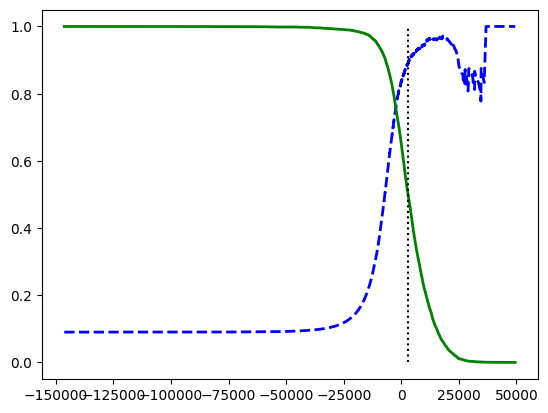

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)  # Plota a precisão em função dos thresholds
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)  # Plota o recall em função dos thresholds
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")  # Adiciona uma linha vertical indicando o threshold atual
# [...]  # Beautify the figure: add grid, legend, axis, labels, and circles
plt.show()  # Exibe o gráfico


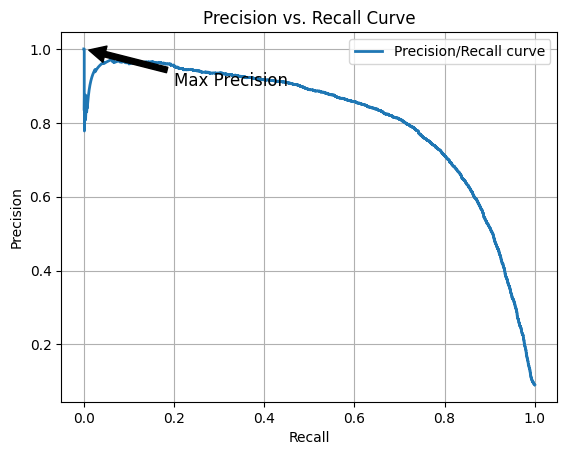

In [ ]:
import numpy as np

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")  # Plota a curva de precisão/recall
plt.xlabel("Recall")  # Adiciona rótulo ao eixo x
plt.ylabel("Precision")  # Adiciona rótulo ao eixo y
plt.title("Precision vs. Recall Curve")  # Adiciona um título ao gráfico
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.legend(loc="best")  # Adiciona a legenda no melhor local

# Adiciona uma seta indicando um ponto específico
arrow_x = recalls[np.argmax(precisions)]
arrow_y = precisions.max()
plt.annotate('Max Precision',
             xy=(arrow_x, arrow_y),
             xytext=(arrow_x + 0.2, arrow_y - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             color='black')

plt.show()  # Exibe o gráfico


In [ ]:
# Identifica o índice onde a precisão é maior ou igual a 0.90
idx_for_90_precision = (precisions >= 0.90).argmax()

# Encontra o valor do threshold correspondente a este índice
threshold_for_90_precision = thresholds[idx_for_90_precision]

# Exibe o valor do threshold que corresponde a uma precisão de 90%
threshold_for_90_precision


3370.0194991439557

In [ ]:
# Gera previsões no conjunto de treinamento usando o threshold calculado para 90% de precisão
y_train_pred_90 = (y_scores >= threshold_for_90_precision)


In [ ]:
# Calcula a precisão das predições quando o limiar é ajustado para 90% de precisão
precision_at_90 = precision_score(y_train_5, y_train_pred_90)

# Calcula a revocação (recall) das predições quando o limiar é ajustado para 90% de precisão
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)

# Imprime os valores de precisão e revocação ao limiar de 90% de precisão
print(precision_at_90)
print(recall_at_90_precision)


0.9000345901072293
0.4799852425751706


In [ ]:
from sklearn.metrics import roc_curve

# Calcula a curva ROC e as correspondentes taxas de falsos positivos (FPR),
# taxas de verdadeiros positivos (TPR) e limiares de decisão (thresholds)
# 'y_train_5' são os rótulos reais e 'y_scores' são os scores de decisão do modelo
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


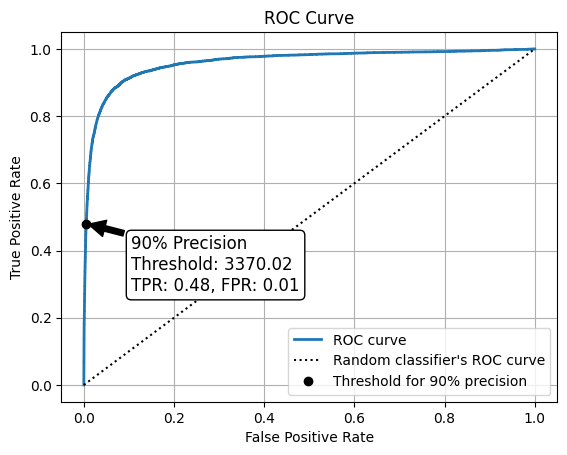

In [ ]:
import matplotlib.pyplot as plt

# Encontra o índice do limiar correspondente a 90% de precisão
# 'thresholds' são os limiares de decisão calculados pela curva ROC
# 'threshold_for_90_precision' é o limiar necessário para obter 90% de precisão
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()

# Obtém a TPR (taxa de verdadeiros positivos) e FPR (taxa de falsos positivos)
# para o limiar de 90% de precisão
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

# Plota a curva ROC
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

# Plota a linha de um classificador aleatório para referência
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

# Plota o ponto na curva ROC que corresponde ao limiar de 90% de precisão
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# Adiciona rótulos aos eixos
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Adiciona um título ao gráfico
plt.title("ROC Curve")

# Adiciona uma grade ao gráfico
plt.grid(True)

# Adiciona a legenda
plt.legend(loc="best")

# Adiciona uma seta e texto para indicar o ponto de 90% de precisão
plt.annotate(f'90% Precision\nThreshold: {threshold_for_90_precision:.2f}\nTPR: {tpr_90:.2f}, FPR: {fpr_90:.2f}',
             xy=(fpr_90, tpr_90), xytext=(fpr_90 + 0.1, tpr_90 - 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Exibe o gráfico
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Calcula a área sob a curva ROC (AUC-ROC)
# 'y_train_5' são os rótulos reais e 'y_scores' são os scores de decisão do modelo
auc_score = roc_auc_score(y_train_5, y_scores)

# Imprime o valor da AUC-ROC
print(auc_score)


0.9604938554008616


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Cria uma instância do classificador RandomForest
# 'random_state=42' é definido para garantir reprodutibilidade dos resultados
forest_clf = RandomForestClassifier(random_state=42)


In [ ]:
# Importa a função cross_val_predict do módulo sklearn.model_selection
from sklearn.model_selection import cross_val_predict

# Utiliza a função cross_val_predict para gerar predições probabilísticas com validação cruzada
# 'forest_clf' é o classificador Random Forest
# 'X_train' são os dados de treino
# 'y_train_5' são os rótulos de treino (classe 5)
# 'cv=3' indica que será usada uma validação cruzada com 3 folds
# 'method="predict_proba"' especifica que queremos as probabilidades previstas (em vez das classes previstas)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest[:2]

In [ ]:
# Obtém os scores de decisão para a classe positiva (classe 1)
# 'y_probas_forest' são as probabilidades previstas para cada classe
# Selecionamos a coluna 1, que corresponde à probabilidade da classe positiva
y_scores_forest = y_probas_forest[:, 1]

# Importa a função precision_recall_curve do módulo sklearn.metrics
from sklearn.metrics import precision_recall_curve

# Calcula as precisões, recalls e limiares para a curva de precisão-recall
# 'y_train_5' são os rótulos reais
# 'y_scores_forest' são os scores de decisão para a classe positiva
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)


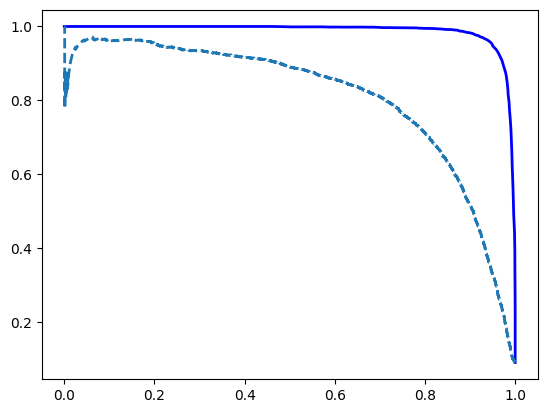

In [ ]:
# Plota a curva de precisão-recall para o Random Forest
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")

# Plota a curva de precisão-recall para o SGD Classifier (exemplo fictício, substitua pelos seus dados)
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# [...] Adicione aqui código para embelezar o gráfico: rótulos, grade, legenda, etc.

# Exibe o gráfico
plt.show()


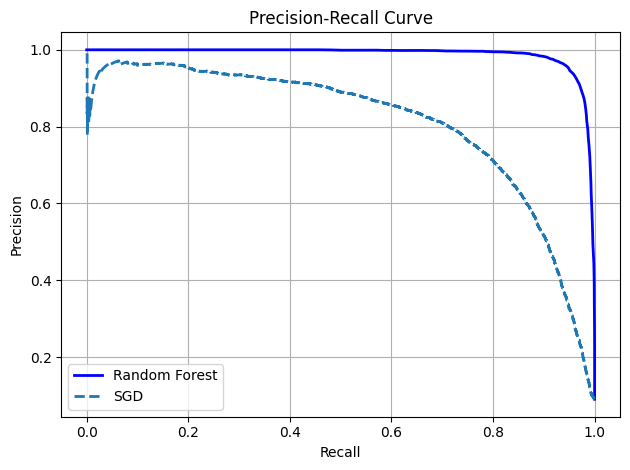

In [ ]:
# Plota a curva de precisão-recall para o Random Forest
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")

# Plota a curva de precisão-recall para o SGD Classifier (exemplo fictício, substitua pelos seus dados)
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# Adiciona rótulos aos eixos
plt.xlabel('Recall')
plt.ylabel('Precision')

# Adiciona um título ao gráfico
plt.title('Precision-Recall Curve')

# Adiciona uma grade ao gráfico
plt.grid(True)

# Adiciona uma legenda ao gráfico
plt.legend(loc='best')

# Ajusta automaticamente os limites dos eixos para melhor visualização
plt.tight_layout()

# Exibe o gráfico
plt.show()


In [ ]:
# Calcula as predições binárias com base na probabilidade positiva ≥ 50%
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5

# Importa as funções f1_score e roc_auc_score do módulo sklearn.metrics
from sklearn.metrics import f1_score, roc_auc_score

# Calcula o F1-score para as predições do Random Forest
f1_score_forest = f1_score(y_train_5, y_train_pred_forest)

# Calcula a AUC-ROC (Area Under the Curve - Receiver Operating Characteristic) para o Random Forest
auc_roc_score_forest = roc_auc_score(y_train_5, y_scores_forest)
